# **Investigate Hotel Business using Data Visualization**

Author : Althaaf Athaayaa Daffa Qushayyizidane - Data Science Batch 34

---

### **Load Dataset**

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [3]:
hb_raw = pd.read_csv('hotel_bookings_data.csv')
hb_raw.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
19521,Resort Hotel,0,297,2018,February,52,23,1,2,2,...,2,No Deposit,NaN,NaN,0,Family,60.87,0,3,Check-Out
72410,City Hotel,1,183,2019,September,30,28,0,1,2,...,0,No Deposit,9.0,NaN,0,Personal,139.50,0,1,Canceled
99411,City Hotel,0,25,2018,December,42,9,2,2,2,...,0,No Deposit,28.0,NaN,0,Personal,85.00,0,0,Check-Out
28886,Resort Hotel,0,235,2018,December,43,17,1,1,2,...,0,No Deposit,NaN,NaN,0,Personal,74.50,1,1,Check-Out
33571,Resort Hotel,0,3,2019,April,9,26,1,0,1,...,0,No Deposit,314.0,NaN,0,Personal,39.60,1,0,Check-Out


# **Data Exploration**

### **Descriptive Statictics**

---

In [4]:
hb_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

- Terdapat **29** kolom pada dataset dan memiliki **119.390** baris.
- Terdapat **8** data kategorikal dan **20** data numerik. 

### **Checking Null Value**

---

In [5]:
missing_value = hb_raw.isna().sum()
missing_value

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

Dari 29 kolom terdapat **4** kolom yang memiliki missing value yaitu kolom  **children**, **city**, **agent**, dan **company**. Dimana nantinya akan dilakukan imputasi.

In [6]:
# Menghitung besarnya missing value dibandingkan keseluruhan data di dataset
total_cells = np.product(hb_raw.shape)
total_missing = missing_value.sum()

percent_missing = round((total_missing/total_cells) * 100,2)
print(f'{percent_missing}%')

3.74%


### **Checking Duplicate Data**

---

In [7]:
hb_raw.duplicated().sum()

33261

Terdapat **33.261** data duplikat dan tidak akan dihapus karena data duplikat terlalu banyak yang dikhawatirkan akan mempengaruhi nilai statistik dalam analisis.

### **Group Columns by Type**

---

In [8]:
# Pengelompokan kolom berdasarkan jenisnya
num = ['int64', 'int32', 'int16', 'float64', 'float32', 'float16']
num = hb_raw.select_dtypes(include=num)
num = num.columns
cats = ['arrival_date_month','meal','city','market_segment','distribution_channel','deposit_type','customer_type','reservation_status']

**Numerical Feature**

In [9]:
hb_raw[num].describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Fitur adr, **Averange Daily Rate** (room revenue/number of room sold) terdapat **value negatif**. Hal itu merupakan anomali dan perlu didrop.

**Univariate Analysis**

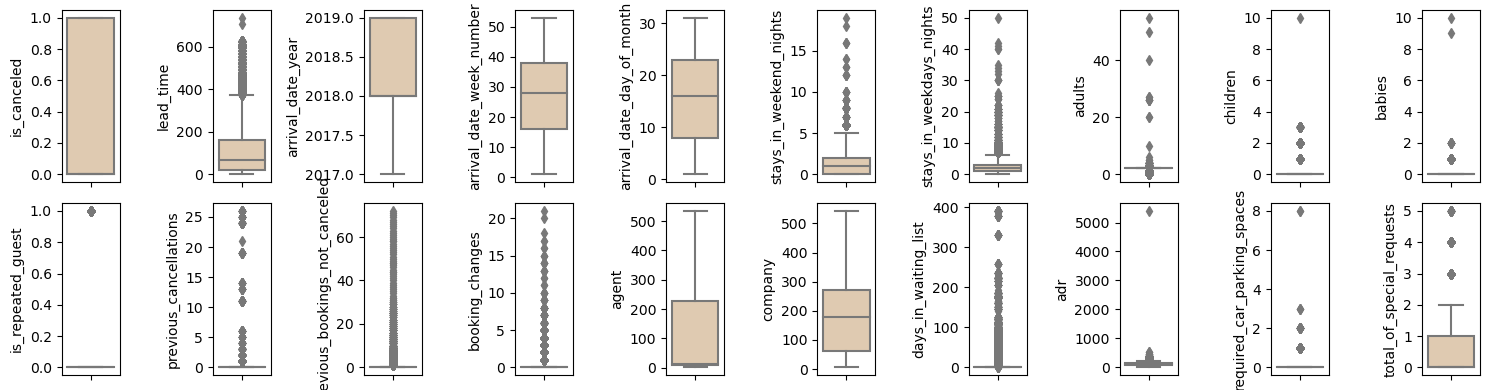

In [10]:
plt.figure(figsize=(15, 4))
for i in range(0, len(num)):
    plt.subplot(2, 10, i+1)
    sns.boxplot(y=hb_raw[num[i]], color = '#E7CBA9', data=hb_raw, orient = 'v')
    plt.tight_layout()

- Secara keseluruhan, mayoritas fitur memiliki outlier<br>
- Terlihat gap outlier yang cukup ekstrim  pada fitur <mark>adr</mark>, <mark>required_car_parking_spaces</mark>, <mark>children</mark>, dan <mark>babies</mark><br>
- Handling outlier akan dilakukan menghilangkan nilai ekstrim saja, agar tidak mengurangi insight yang dihasilkan

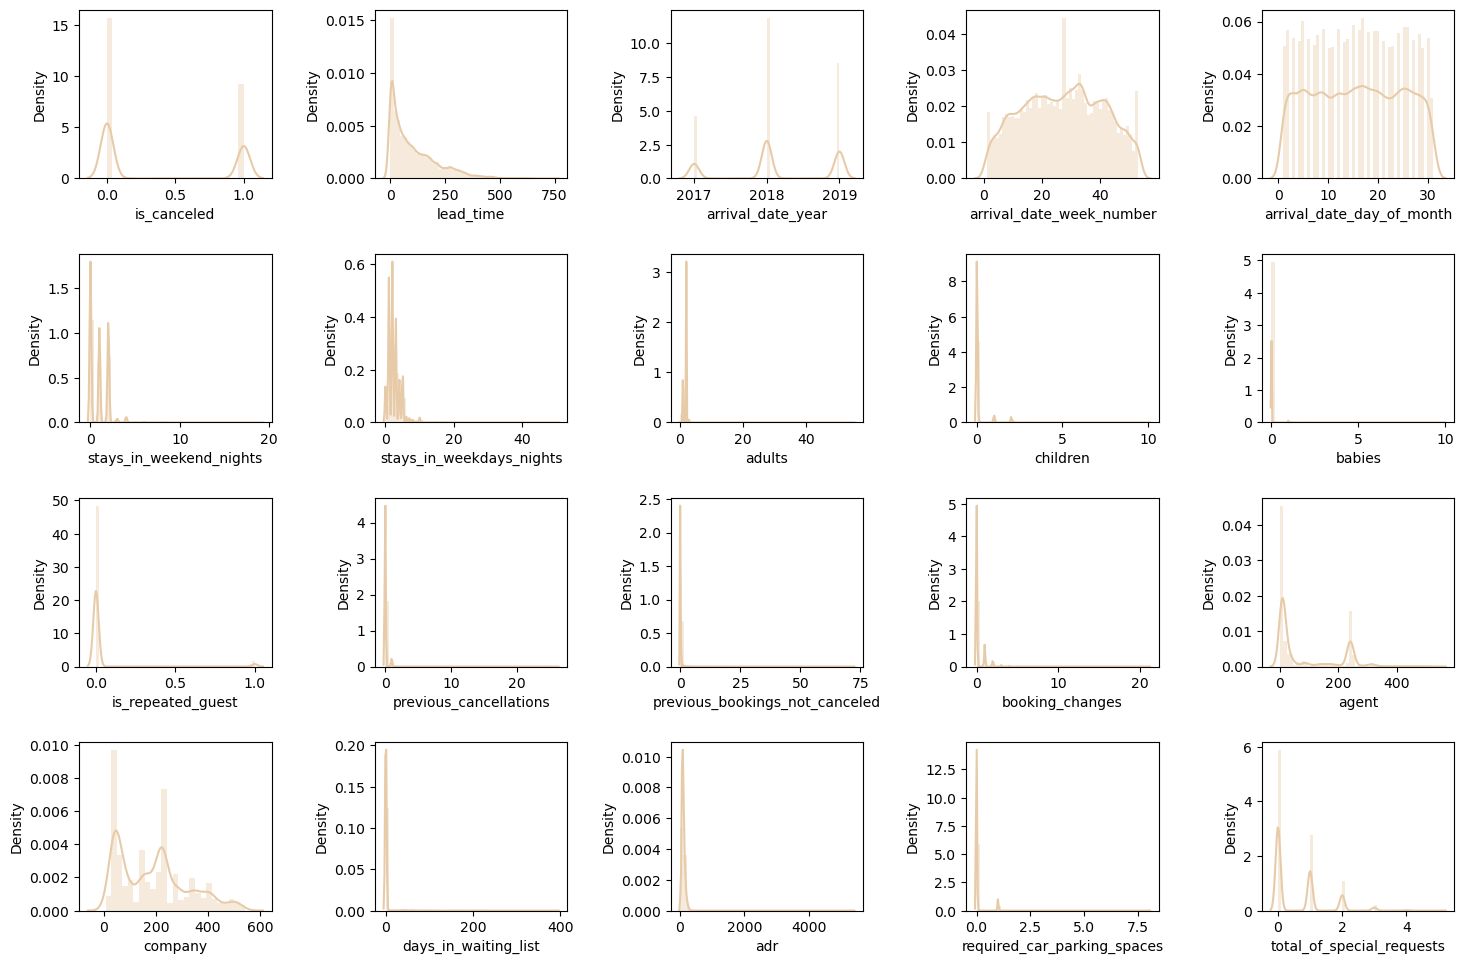

In [11]:
plt.figure(figsize=(15, 10))
for i in range(0, len(num)):
    plt.subplot(4, 5, i+1)
    sns.distplot(hb_raw[num[i]], color='#E7CBA9')
    plt.tight_layout(pad=2)

- Secara keseluruhan fitur cenderung **positive skewd**.<br>
- <mark>arrival_date_week_number</mark> dan <mark>arrival_date_day_of_month</mark> memiliki distribusi cenderung **normal**.

**Categorical Feature**

In [12]:
hb_raw[cats].describe()

,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
count,119390,119390,118902,119390,119390,119390,119390,119390
unique,12,5,177,8,5,3,4,3
top,October,Breakfast,Kota Denpasar,Online TA,TA/TO,No Deposit,Personal,Check-Out
freq,13877,92310,48590,56477,97870,104641,89613,75166


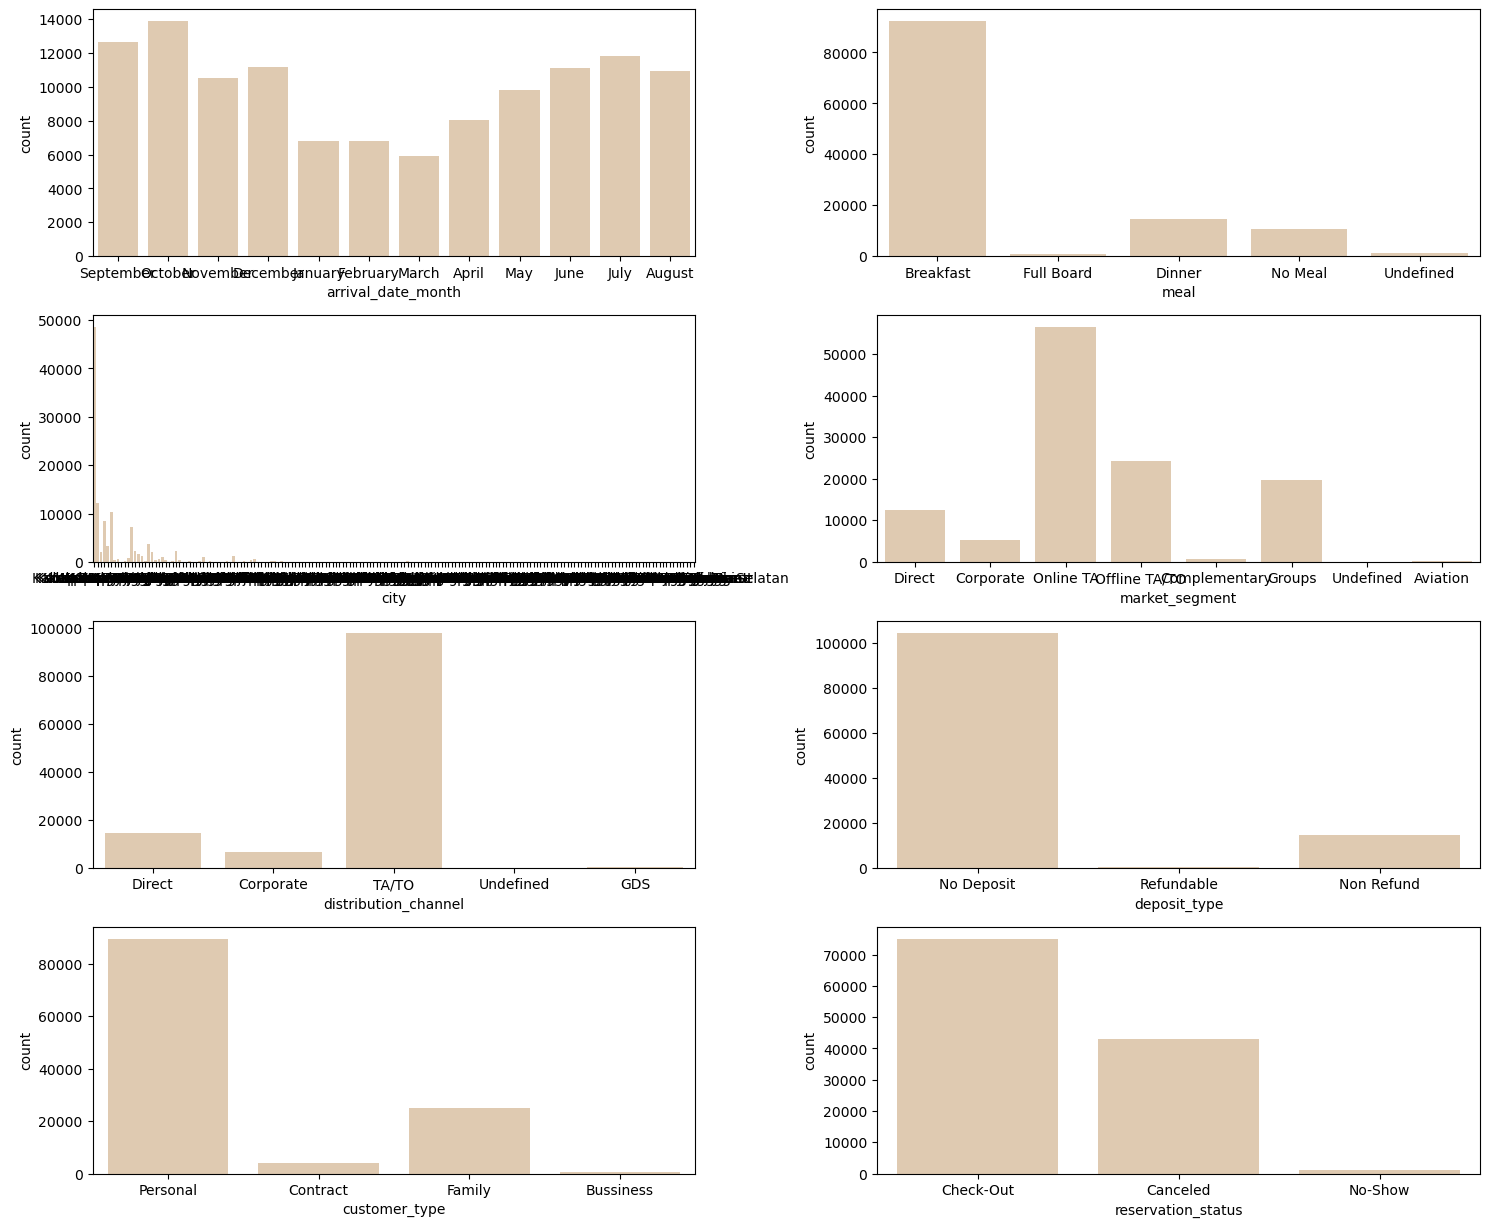

In [13]:
plt.figure(figsize=(15, 15))
for i in range(0, len(cats)):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=hb_raw[cats[i]], color='#E7CBA9')
    plt.tight_layout()

Mengecek data anomali tamu = 0 atau tedapat kamar yang dibooking namun tidak ada tamu yang menginap

In [14]:
zero_guest = hb_raw['stays_in_weekend_nights'] + hb_raw['stays_in_weekdays_nights'] + hb_raw['adults'] + hb_raw['children'] + hb_raw['babies']
zero_guest = hb_raw[zero_guest == 0]
zero_guest.shape[0]

70

Terdapat **70 kamar tidak memiliki tamu** dan data ini nantinya akan di **drop**.

# **Data Cleansing**

### Handling Null Values

---

In [15]:
hb_clean =  hb_raw.copy()

Imputasi kolom kategorikal

In [16]:
hb_clean['city'].fillna('Undefined', inplace=True)

Imputasi kolom numerik

In [17]:
imp = ['company', 'children', 'agent']
for col in imp:
    hb_clean[col].fillna(0, inplace=True)


In [18]:
hb_clean.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

### Handling Inconsistent and Extream Values

---

Mengubah fitur <mark>**meal**</mark> hanya menjadi 2 kategori saja yaitu **'With Meal'** dan **'No Meal'**.

In [19]:
hb_clean['meal'].replace('Undefined', 'No Meal', inplace = True)
hb_clean['meal'].replace(['Breakfast', 'Full Board', 'Dinner'], 'With Meal', inplace = True)

Fitur <mark>**children**</mark> sebaiknya menggunakan datatype integer.

In [20]:
hb_clean['children'] = hb_clean['children'].astype('int64')

Menghapus nilai **ekstrim** pada data

In [21]:
# adr adr
index_adr = hb_clean[(hb_clean['adr'] < 0) | (hb_clean['adr'] > 5000)]
hb_clean.drop(index = index_adr.index, inplace=True)

# --------------------------------------------------------------------------------
# required_car_parking_spaces
index_parking = hb_clean[(hb_clean['required_car_parking_spaces'] == 8)]
hb_clean.drop(index = index_parking.index, inplace=True)

# --------------------------------------------------------------------------------
# babies
index_bb = hb_clean[(hb_clean['babies'] > 8)]
hb_clean.drop(index = index_bb.index, inplace=True)

# --------------------------------------------------------------------------------
# children
index_ch = hb_clean[(hb_clean['children'] == 10)]
hb_clean.drop(index = index_ch.index, inplace=True)

# --------------------------------------------------------------------------------
# tidak ada tamu
index_zero_guest = hb_raw['stays_in_weekend_nights'] + hb_raw['stays_in_weekdays_nights'] + hb_raw['adults'] + hb_raw['children'] + hb_raw['babies']
index_zero_guest = hb_clean[index_zero_guest == 0]
hb_clean.drop(index = index_zero_guest.index, inplace=True)


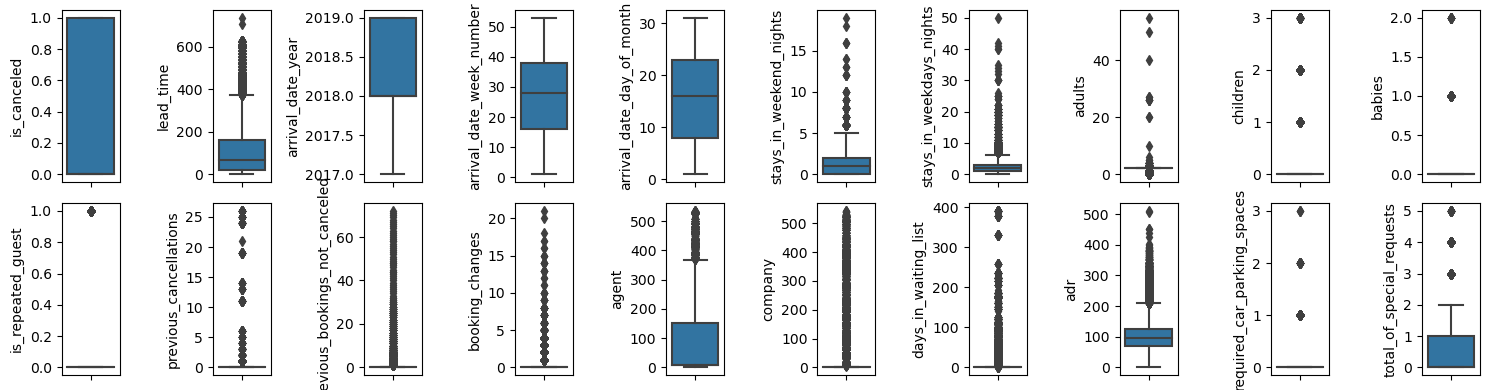

In [22]:
# cek outlier fitur numerikal
plt.figure(figsize=(15, 4))
for i in range(0, len(num)):
    plt.subplot(2, 10, i+1)
    sns.boxplot(y=hb_clean[num[i]], orient='v')
    plt.tight_layout()

# **Monthly Hotel Booking Analysis**

## **Data Visualization**

In [23]:
hb_fromclean = hb_clean.copy()

In [24]:
hb_fromclean.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
53264,City Hotel,1,350,2018,August,25,17,0,2,2,...,0,Non Refund,29.0,0.0,0,Personal,140.00,0,0,Canceled
61769,City Hotel,1,263,2018,February,53,26,1,3,2,...,0,No Deposit,8.0,0.0,0,Personal,63.75,0,0,Canceled
49631,City Hotel,1,62,2018,June,16,16,2,1,2,...,0,No Deposit,9.0,0.0,0,Personal,118.80,0,0,Canceled
82555,City Hotel,0,59,2017,February,53,28,1,4,2,...,0,No Deposit,14.0,0.0,0,Personal,86.41,1,0,Check-Out
19821,Resort Hotel,0,0,2018,March,2,3,1,0,2,...,0,No Deposit,240.0,0.0,0,Personal,48.00,0,1,Check-Out


### **Ratio Total Booking**

---

In [25]:
hotel_type = hb_fromclean.groupby('hotel')[['hotel']].count()
#-------------------------------------------------------------------
hotel_type.columns = ['total']
hotel_type.reset_index(inplace=True)
hotel_type

,hotel,total
0,City Hotel,79260
1,Resort Hotel,40053


In [26]:
data = [79260, 40053]
labels = ['City Hotel', 'Resort Hotel']

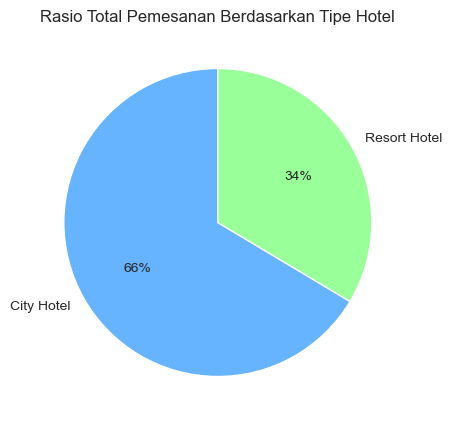

In [27]:
plt.figure(figsize=(5, 5))
sns.set_style('white')
colors = ['#66b3ff', '#99ff99'] #sns.color_palette('pastel')
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%', startangle=90)
plt.title('Rasio Total Pemesanan Berdasarkan Tipe Hotel')
plt.show()

- Dari plot ini, Anda dapat melihat bahwa ada dua tipe hotel yang dipilih oleh pelanggan: City Hotel dan Resort Hotel. City Hotel adalah hotel yang berlokasi di kota-kota besar, sedangkan Resort Hotel adalah hotel yang berlokasi di daerah wisata alam.<br>

- Dari plot ini, Anda juga dapat melihat bahwa <mark>**City Hotel**</mark> mendominasi pemesanan dengan **proporsi 66%**, sedangkan <mark>**Resort Hotel**</mark> hanya memiliki **proporsi 34%**. Ini berarti bahwa lebih banyak pelanggan yang memilih untuk menginap di hotel yang berada di pusat kota daripada hotel yang berada di daerah wisata alam.

**KESIMPULAN**

- **Preferensi pelanggan**: Pelanggan lebih menyukai hotel yang berada di kota-kota besar, mungkin karena alasan kemudahan akses, fasilitas, atau harga.<br>

- **Potensi pasar**: Resort Hotel memiliki potensi pasar yang lebih besar, karena **masih ada banyak pelanggan yang belum mencoba** hotel yang berada di daerah wisata alam. Resort Hotel dapat meningkatkan pemasarannya untuk menarik lebih banyak pelanggan.<br>

- **Strategi bisnis**: City Hotel dan Resort Hotel dapat mengembangkan strategi bisnis yang berbeda sesuai dengan karakteristik dan kebutuhan pelanggan mereka. **City Hotel dapat fokus pada kualitas layanan, keamanan, dan kenyamanan**, sedangkan **Resort Hotel dapat fokus pada pengalaman, keindahan, dan keunikan**.

### **Ratio Total Booking per Month**

---

In [28]:
mh_booking = hb_fromclean.groupby(['hotel', 'arrival_date_month'])['arrival_date_year'].agg(['nunique', 'count']).reset_index()
mh_booking

,hotel,arrival_date_month,nunique,count
0,City Hotel,April,2,4959
1,City Hotel,August,2,7890
2,City Hotel,December,2,7602
3,City Hotel,February,2,4117
4,City Hotel,January,2,4346
5,City Hotel,July,2,8229
6,City Hotel,June,2,7475
7,City Hotel,March,2,3732
8,City Hotel,May,2,6443
9,City Hotel,November,2,7400


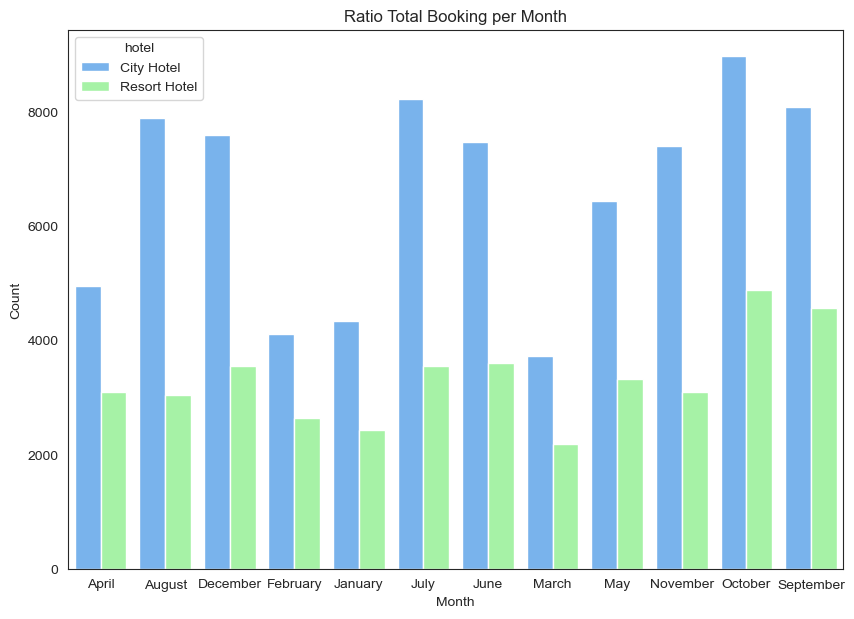

In [29]:
plt.figure(figsize=(10, 7))
sns.barplot(x='arrival_date_month', y='count', hue='hotel', data=mh_booking, palette=colors)
plt.title('Ratio Total Booking per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


### **Normalization**

---

In [30]:
# menghitung rata-rata dari count dibagi nunique
mh_booking['average'] = round(mh_booking['count']/mh_booking['nunique'])
mh_booking

,hotel,arrival_date_month,nunique,count,average
0,City Hotel,April,2,4959,2480.0
1,City Hotel,August,2,7890,3945.0
2,City Hotel,December,2,7602,3801.0
3,City Hotel,February,2,4117,2058.0
4,City Hotel,January,2,4346,2173.0
5,City Hotel,July,2,8229,4114.0
6,City Hotel,June,2,7475,3738.0
7,City Hotel,March,2,3732,1866.0
8,City Hotel,May,2,6443,3222.0
9,City Hotel,November,2,7400,3700.0


### **Sort the Data by Month**

---

In [31]:
# Membuat kolom 'arrival_date_month' menjadi kategori yang diurutkan
mh_booking['arrival_date_month'] = pd.Categorical(mh_booking['arrival_date_month'], categories= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

# Mengurutkan data berdasarkan kolom 'arrival_date_month'
mh_booking = mh_booking.sort_values('arrival_date_month')
mh_booking


,hotel,arrival_date_month,nunique,count,average
4,City Hotel,January,2,4346,2173.0
16,Resort Hotel,January,2,2436,1218.0
3,City Hotel,February,2,4117,2058.0
15,Resort Hotel,February,2,2648,1324.0
7,City Hotel,March,2,3732,1866.0
19,Resort Hotel,March,2,2193,1096.0
0,City Hotel,April,2,4959,2480.0
12,Resort Hotel,April,2,3102,1551.0
20,Resort Hotel,May,2,3333,1666.0
8,City Hotel,May,2,6443,3222.0


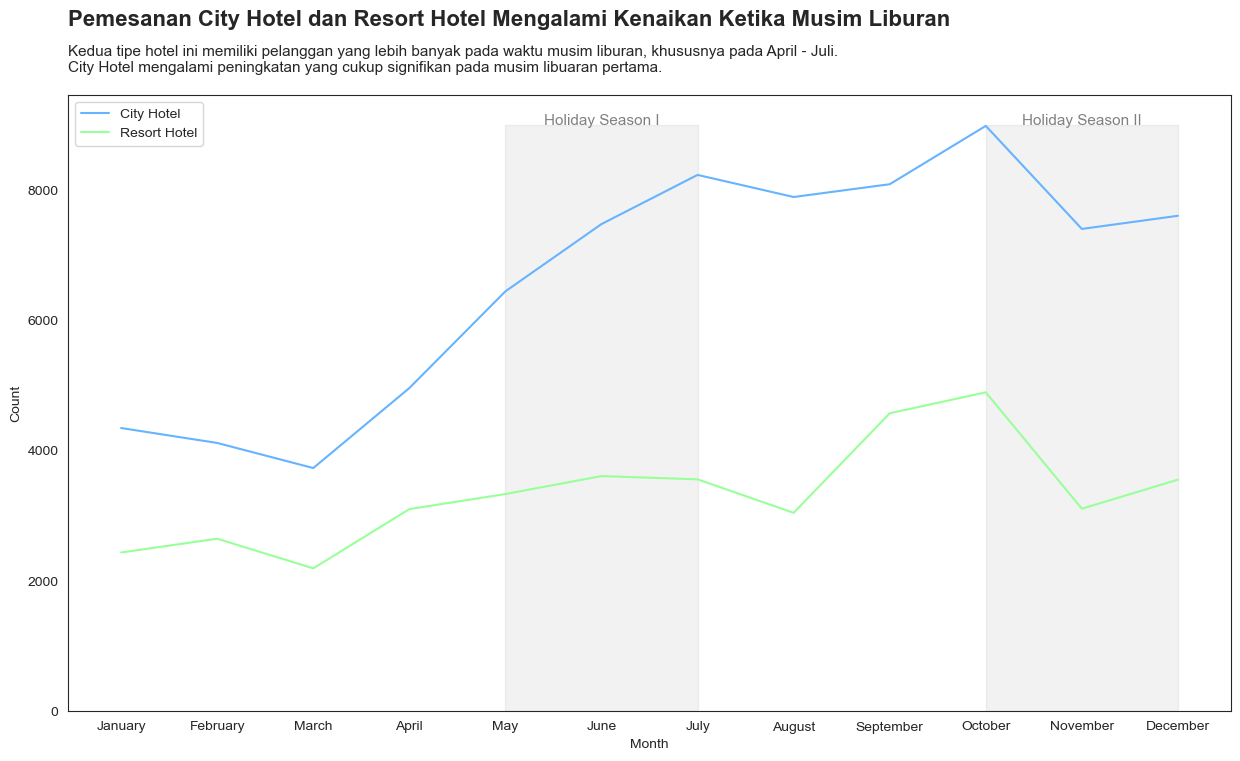

In [32]:
plt.figure(figsize=(15, 8))
# Membuat line chart dengan seaborn
sns.lineplot(x="arrival_date_month", y="count", hue="hotel", data=mh_booking, palette=colors)

# Menambahkan judul dan label sumbu
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(loc='upper left')

# menambahkan judul dan deskripsi
plt.title('Pemesanan City Hotel dan Resort Hotel Mengalami Kenaikan Ketika Musim Liburan', fontsize=16, pad=50, loc='left',fontweight='bold')
plt.text(y = 10000, x = -0.55, s = 'Kedua tipe hotel ini memiliki pelanggan yang lebih banyak pada waktu musim liburan, khususnya pada April - Juli. \nCity Hotel mengalami peningkatan yang cukup signifikan pada musim libuaran pertama.', 
         ha='left', va='center', size=11)

#set holiday season I
plt.stackplot([4, 5, 6], [9000], color='grey', alpha=0.1)
plt.text(x=5, y=9000, s='Holiday Season I', fontsize=11, color='grey', ha='center')

#set holiday season
plt.stackplot([9, 10, 11], [9000], color='grey', alpha=0.1)
plt.text(x=10, y=9000, s='Holiday Season II', fontsize=11, color='grey', ha='center')

# Menampilkan line chart
plt.show()


- **Tren musiman**: Resort hotel memiliki jumlah pemesanan yang lebih tinggi selama musim liburan, yaitu pada bulan Juli, Agustus, dan Desember. Ini mungkin karena resort hotel berlokasi di daerah wisata alam yang lebih diminati oleh pelanggan saat liburan. Sementara itu, city hotel memiliki jumlah pemesanan yang lebih konsisten sepanjang tahun. Ini mungkin karena city hotel berlokasi di kota-kota besar yang memiliki permintaan yang stabil dari pelanggan bisnis atau non-liburan.<br>

- **Perbandingan hotel**: City hotel selalu memiliki jumlah pemesanan yang lebih tinggi daripada resort hotel di setiap bulan. Ini mungkin karena city hotel memiliki kapasitas yang lebih besar, harga yang lebih murah, atau pemasaran yang lebih efektif daripada resort hotel.

## **Impact Analysis of Stay Duration on Hotel Bookings Cancelation Rate**

### **Stay Duration**

---

In [33]:
hb_fromclean['total_stay_duration'] = hb_fromclean['stays_in_weekend_nights'] + hb_fromclean['stays_in_weekdays_nights']
hb_fromclean.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_stay_duration
60500,City Hotel,1,143,2018,January,46,12,2,1,2,...,No Deposit,9.0,0.0,0,Personal,90.00,0,0,Canceled,3
6333,Resort Hotel,0,294,2018,August,23,3,2,7,2,...,No Deposit,0.0,0.0,0,Personal,59.00,0,0,Check-Out,9
44653,City Hotel,0,50,2017,December,41,9,0,2,2,...,No Deposit,32.0,0.0,49,Family,85.00,0,0,Check-Out,2
81345,City Hotel,0,11,2017,February,49,5,2,2,2,...,No Deposit,1.0,0.0,0,Family,104.00,0,0,Check-Out,4
39108,Resort Hotel,0,19,2019,October,31,4,2,2,2,...,No Deposit,241.0,0.0,0,Personal,175.14,1,1,Check-Out,4


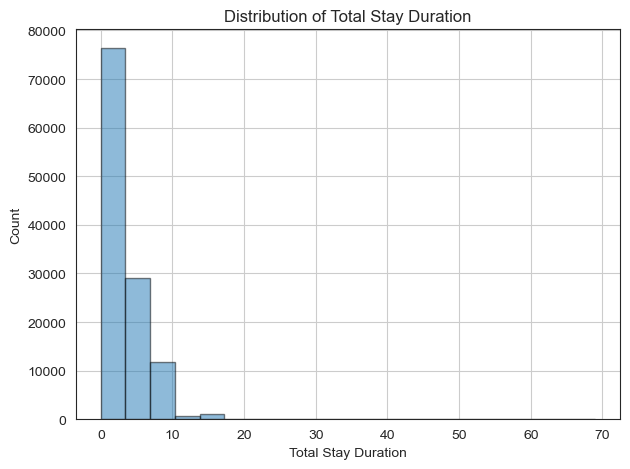

In [34]:
plt.hist(hb_fromclean['total_stay_duration'], bins=20, alpha=0.5, edgecolor='black')
plt.xlabel('Total Stay Duration') 
plt.ylabel('Count') 
plt.title('Distribution of Total Stay Duration')
plt.grid()
plt.tight_layout() 
plt.show()

In [35]:
hb_fromclean['total_stay_week'] = np.where((hb_fromclean['total_stay_duration']) < 8, '< 1' ,
                                   np.where((hb_fromclean['total_stay_duration']) < 15, '1-2',
                                   np.where((hb_fromclean['total_stay_duration']) < 22, '2-3', 
                                   np.where((hb_fromclean['total_stay_duration']) < 29, '3-4', '> 4'))))

In [36]:
hb_fromclean['total_stay_week'].value_counts()

< 1    114058
1-2      4816
2-3       277
3-4       111
> 4        51
Name: total_stay_week, dtype: int64

### **Total Cancelation Rate**

---

In [37]:
chotel_cancel = hb_fromclean[hb_fromclean['hotel'] == 'City Hotel']

In [38]:
cancel = chotel_cancel.groupby('is_canceled')[['is_canceled']].count()
cancel

,is_canceled
is_canceled,
0,46169
1,33091


In [39]:
cancel.columns = ['total']
cancel.reset_index(inplace=True)

In [40]:
mc = {0 : 'Not Canceled',
    1 : 'Canceled'}
    
cancel['is_canceled'] = cancel['is_canceled'].map(mc)
cancel

,is_canceled,total
0,Not Canceled,46169
1,Canceled,33091


In [41]:
data = [46169, 33091]
labels = ['Not Canceled', 'Canceled']

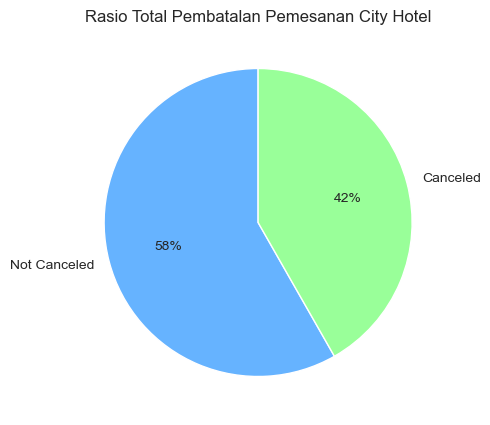

In [42]:
plt.figure(figsize=(5, 5))
sns.set_style('white')
colors = ['#66b3ff', '#99ff99'] #sns.color_palette('pastel')
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%', startangle=90)
plt.title('Rasio Total Pembatalan Pemesanan City Hotel')
plt.show()

- 42% dari total pemesanan city hotel dibatalkan, sedangkan 58% tidak dibatalkan. Ini berarti bahwa lebih dari setengah dari pemesanan city hotel berhasil dilakukan.

- **Dampak pembatalan terhadap bisnis**, ada beberapa kemungkinan dampak yang dapat dipertimbangkan adalah: penurunan pendapatan, peningkatan biaya operasional, penurunan loyalitas pelanggan, penurunan reputasi, dan peningkatan persaingan.

In [43]:
rhotel_cancel = hb_fromclean[hb_fromclean['hotel'] == 'Resort Hotel']

In [44]:
cancell = rhotel_cancel.groupby('is_canceled')[['is_canceled']].count()
cancell

,is_canceled
is_canceled,
0,28934
1,11119


In [45]:
cancell.columns = ['total']
cancell.reset_index(inplace=True)

In [46]:
rc = {0 : 'Not Canceled',
    1 : 'Canceled'}
    
cancell['is_canceled'] = cancell['is_canceled'].map(rc)
cancell

,is_canceled,total
0,Not Canceled,28934
1,Canceled,11119


In [47]:
data = [28934, 11119]
labels = ['Not Canceled', 'Canceled']

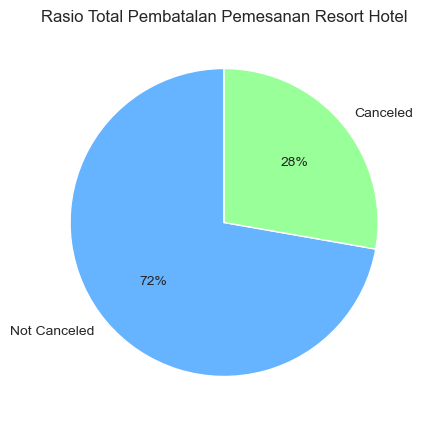

In [48]:
plt.figure(figsize=(5, 5))
sns.set_style('white')
colors = ['#66b3ff', '#99ff99'] #sns.color_palette('pastel')
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%', startangle=90)
plt.title('Rasio Total Pembatalan Pemesanan Resort Hotel')
plt.show()

- 28% dari total pemesanan resort hotel dibatalkan, sedangkan 72% tidak dibatalkan. Ini berarti bahwa lebih dari dua pertiga dari pemesanan resort hotel berhasil dilakukan.

- **Perbandingan dengan city hotel**, Dari perbandingan tersebut, dapat dilihat bahwa resort hotel memiliki rasio pembatalan yang lebih rendah daripada city hotel. Ini dapat menunjukkan bahwa pelanggan lebih berkomitmen untuk menginap di resort hotel daripada city hotel.

- **Dampak pembatalan terhadap bisnis**, ada beberapa kemungkinan dampak yang dapat dipertimbangkan adalah: penurunan pendapatan, peningkatan biaya operasional, penurunan loyalitas pelanggan, penurunan reputasi, dan peningkatan persaingan.

### **Cancelation Rate by Stay Duration**

---

In [49]:
cancel_by_stay = hb_fromclean.groupby(['hotel', 'total_stay_week']).agg({'is_canceled' : 'sum', 'arrival_date_day_of_month' : 'count'}).reset_index()


In [50]:
cancel_by_stay['cancel_rate'] = round(cancel_by_stay['is_canceled'] / cancel_by_stay['arrival_date_day_of_month']*100,2)
cancel_by_stay.sort_values('total_stay_week')

,hotel,total_stay_week,is_canceled,arrival_date_day_of_month,cancel_rate
0,City Hotel,1-2,558,1086,51.38
5,Resort Hotel,1-2,1077,3730,28.87
1,City Hotel,2-3,77,108,71.30
6,Resort Hotel,2-3,79,169,46.75
2,City Hotel,3-4,21,28,75.00
7,Resort Hotel,3-4,39,83,46.99
3,City Hotel,< 1,32415,78012,41.55
8,Resort Hotel,< 1,9917,36046,27.51
4,City Hotel,> 4,20,26,76.92
9,Resort Hotel,> 4,7,25,28.00


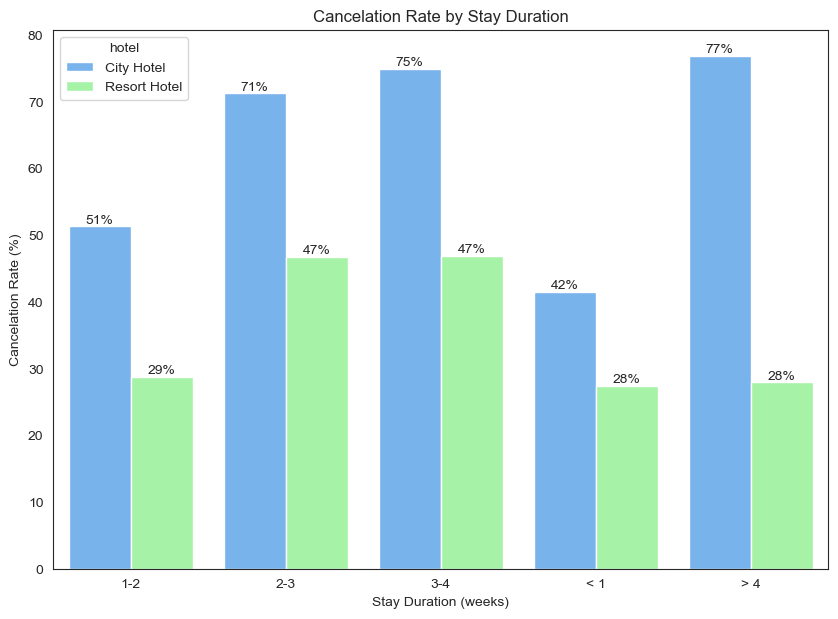

In [51]:
plt.figure(figsize=(10, 7))
sns.barplot(x='total_stay_week', y='cancel_rate', hue='hotel', data=cancel_by_stay, palette=colors)
plt.title('Cancelation Rate by Stay Duration')
plt.xlabel('Stay Duration (weeks)')
plt.ylabel('Cancelation Rate (%)')
ax = plt.gca() 
for container in ax.containers: 
    ax.bar_label(container, fmt='%.0f%%')
plt.show()


- **Tingkat pembatalan pemesanan hotel meningkat seiring dengan durasi menginap**. Ini berlaku untuk kedua jenis hotel, yaitu city hotel dan resort hotel. Ini dapat menunjukkan bahwa pelanggan yang memesan untuk menginap lebih lama lebih berisiko untuk membatalkan pemesanan mereka karena berbagai alasan.

- **City hotel memiliki tingkat pembatalan yang lebih tinggi daripada resort hotel** untuk setiap kategori durasi menginap. Ini dapat menunjukkan bahwa city hotel lebih rentan terhadap pembatalan daripada resort hotel, karena mungkin city hotel lebih mudah diganti dengan hotel lain yang lebih murah atau lebih dekat dengan tujuan pelanggan.

- **Durasi menginap yang paling rendah tingkat pembatalannya adalah kurang dari 1 minggu** untuk kedua jenis hotel. Ini dapat menunjukkan bahwa pelanggan yang memesan untuk menginap kurang dari 1 minggu lebih pasti untuk menginap di hotel yang mereka pilih. Oleh karena itu, hotel dapat menawarkan **diskon** atau **insentif** untuk pelanggan yang memesan untuk menginap kurang dari 1 minggu untuk menarik lebih banyak pelanggan dan mengurangi pembatalan.

## **Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate**

### **Duration of Lead Time**

---

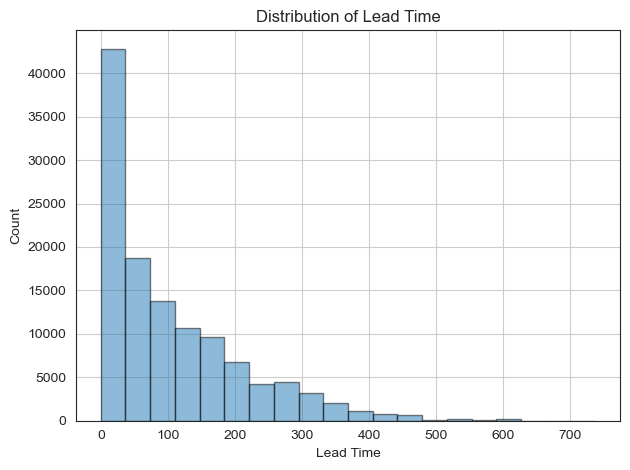

In [52]:
plt.hist(hb_fromclean['lead_time'], bins=20, alpha=0.5, edgecolor='black')
plt.xlabel('Lead Time') 
plt.ylabel('Count') 
plt.title('Distribution of Lead Time')
plt.grid()
plt.tight_layout() 
plt.show()

- **Sebagian besar pemesanan hotel memiliki lead time yang pendek**, yaitu kurang dari 100 hari. Ini berarti bahwa pelanggan cenderung memesan hotel dalam waktu dekat dengan tanggal kedatangan mereka. Plot ini juga menunjukkan bahwa **hanya sedikit pemesanan hotel yang memiliki lead time yang panjang**, yaitu lebih dari 300 hari. Ini berarti bahwa pelanggan jarang memesan hotel jauh-jauh hari sebelum tanggal kedatangan mereka.

- **Pengaruh lead time terhadap tingkat pembatalan**, dari beberapa sumber lain, dapat ditemukan bahwa **lead time berpengaruh positif terhadap tingkat pembatalan**. Artinya, semakin lama lead time, semakin besar kemungkinan pemesanan hotel dibatalkan. Hal ini dapat disebabkan oleh berbagai faktor, seperti **perubahan rencana, ketidakpastian, penawaran lebih baik, atau kebijakan pembatalan yang fleksibel**.

- Beberapa strategi yang dapat dipertimbangkan adalah: menawarkan harga lebih rendah untuk pemesanan dengan lead time pendek, menyediakan insentif untuk pemesanan dengan lead time panjang, menyesuaikan kebijakan pembatalan sesuai dengan lead time, meningkatkan loyalitas pelanggan, dan mengikuti tren permintaan pasar

In [57]:
unik = hb_fromclean['lead_time'].nunique()
max = hb_fromclean['lead_time'].max()
min = hb_fromclean['lead_time'].min()

print('Nilai unik:', unik)
print('Max durasi:', max)
print('Min durasi:', min)

Nilai unik: 479
Max durasi: 737
Min durasi: 0


Lead time memiliki rentang 0 hingga 709 hari, untuk memudahkan interpretasi maka akan dibuat pengkategorian perbualan.

In [60]:
hb_fromclean['lead_cat_per_month'] = np.where((hb_fromclean['lead_time']) < 31, '1',
                        np.where((hb_fromclean['lead_time']) <= 61, '2',
                        np.where((hb_fromclean['lead_time']) <= 91, '3', 
                        np.where((hb_fromclean['lead_time']) <= 121, '4',
                        np.where((hb_fromclean['lead_time']) <= 151, '5',
                        np.where((hb_fromclean['lead_time']) <= 181, '6',
                        np.where((hb_fromclean['lead_time']) <= 211, '7', 
                        np.where((hb_fromclean['lead_time']) <= 241, '8',
                        np.where((hb_fromclean['lead_time']) <= 271, '9',
                        np.where((hb_fromclean['lead_time']) <= 301, '10', 
                        np.where((hb_fromclean['lead_time']) <= 331, '11',
                        np.where((hb_fromclean['lead_time']) <= 361, '12', '>1 tahun'))))))))))))

In [61]:
hb_fromclean['lead_cat_per_month'].value_counts()

1           38637
2           17478
3           12404
4           10364
5            8243
6            7791
7            5610
8            4181
10           3524
>1 tahun     3406
9            3384
11           2581
12           1710
Name: lead_cat_per_month, dtype: int64

### **Cancellation Rate by Lead Time**

---

In [68]:
leadtime_cancel = hb_fromclean.groupby(['hotel', 'lead_cat_per_month']).agg({'is_canceled' : 'sum', 'arrival_date_day_of_month' : 'count'}).reset_index()

In [70]:
leadtime_cancel['lead_cancel_rate'] = round(leadtime_cancel['is_canceled'] / leadtime_cancel['arrival_date_day_of_month']*100,2)
leadtime_cancel['lead_cat_per_month'] = pd.Categorical(leadtime_cancel['lead_cat_per_month'], categories= ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '>1 tahun'], ordered=True)
leadtime_cancel = leadtime_cancel.sort_values('lead_cat_per_month')
leadtime_cancel

,hotel,lead_cat_per_month,is_canceled,arrival_date_day_of_month,lead_cancel_rate
0,City Hotel,1,5190,23297,22.28
13,Resort Hotel,1,1984,15340,12.93
4,City Hotel,2,4802,12266,39.15
17,Resort Hotel,2,1593,5212,30.56
5,City Hotel,3,3601,8780,41.01
18,Resort Hotel,3,1279,3624,35.29
19,Resort Hotel,4,1157,2993,38.66
6,City Hotel,4,3464,7371,46.99
20,Resort Hotel,5,1040,2537,40.99
7,City Hotel,5,2574,5706,45.11


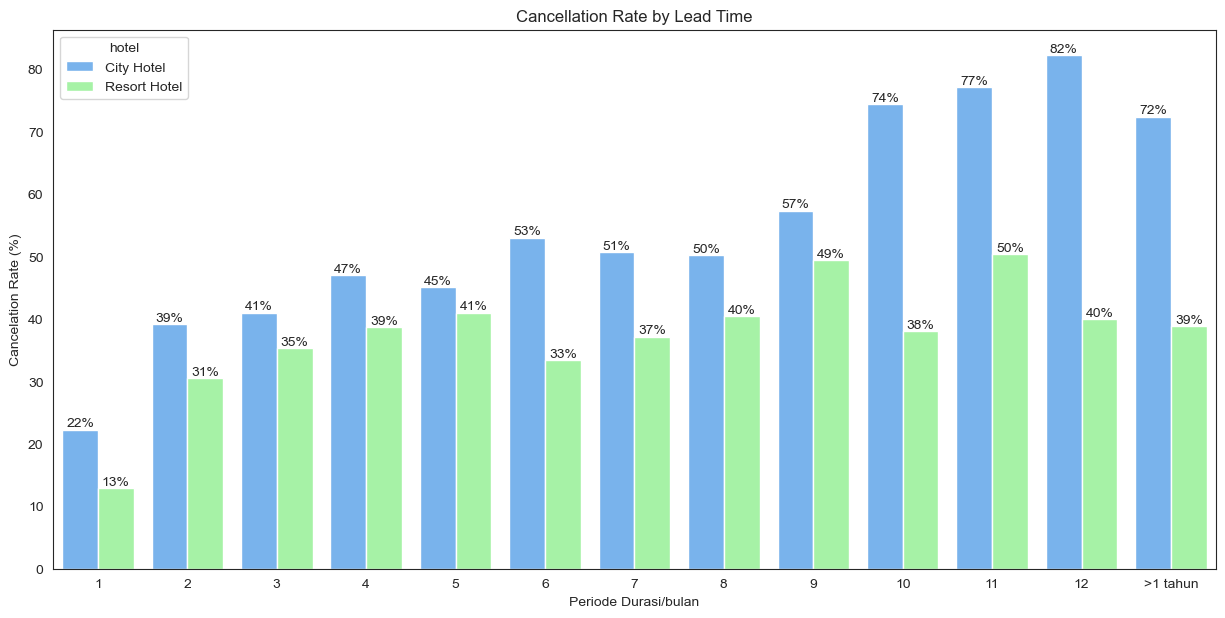

In [73]:
plt.figure(figsize=(15, 7))
sns.barplot(x='lead_cat_per_month', y='lead_cancel_rate', hue='hotel', data=leadtime_cancel, palette=colors)
plt.title('Cancellation Rate by Lead Time')
plt.xlabel('Periode Durasi/bulan')
plt.ylabel('Cancelation Rate (%)')
ax = plt.gca() 
for container in ax.containers: 
    ax.bar_label(container, fmt='%.0f%%')
plt.show()


- City Hotel memiliki tingkat pembatalan yang lebih tinggi dibandingkan dengan Resort Hotel untuk semua periode waktu pemesanan.

- Tingkat pembatalan tertinggi untuk City Hotel terjadi pada waktu pemesanan 12 bulan, sedangkan untuk Resort Hotel, tingkat pembatalan tertinggi adalah pada 11 bulan.

- **Tingkat pembatalan pemesanan hotel cenderung meningkat seiring dengan waktu pemesanan**. Ini berarti bahwa semakin jauh waktu pemesanan dari tanggal kedatangan, semakin besar kemungkinan pemesanan dibatalkan oleh pelanggan.